In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/credit-card-fraud-detection-dataset-2023/creditcard_2023.csv


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("/kaggle/input/credit-card-fraud-detection-dataset-2023/creditcard_2023.csv")

In [4]:
df.head()

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-0.260648,-0.469648,2.496266,-0.083724,0.129681,0.732898,0.519014,-0.130006,0.727159,...,-0.110552,0.217606,-0.134794,0.165959,0.126280,-0.434824,-0.081230,-0.151045,17982.10,0
1,1,0.985100,-0.356045,0.558056,-0.429654,0.277140,0.428605,0.406466,-0.133118,0.347452,...,-0.194936,-0.605761,0.079469,-0.577395,0.190090,0.296503,-0.248052,-0.064512,6531.37,0
2,2,-0.260272,-0.949385,1.728538,-0.457986,0.074062,1.419481,0.743511,-0.095576,-0.261297,...,-0.005020,0.702906,0.945045,-1.154666,-0.605564,-0.312895,-0.300258,-0.244718,2513.54,0
3,3,-0.152152,-0.508959,1.746840,-1.090178,0.249486,1.143312,0.518269,-0.065130,-0.205698,...,-0.146927,-0.038212,-0.214048,-1.893131,1.003963,-0.515950,-0.165316,0.048424,5384.44,0
4,4,-0.206820,-0.165280,1.527053,-0.448293,0.106125,0.530549,0.658849,-0.212660,1.049921,...,-0.106984,0.729727,-0.161666,0.312561,-0.414116,1.071126,0.023712,0.419117,14278.97,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568630 entries, 0 to 568629
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   id      568630 non-null  int64  
 1   V1      568630 non-null  float64
 2   V2      568630 non-null  float64
 3   V3      568630 non-null  float64
 4   V4      568630 non-null  float64
 5   V5      568630 non-null  float64
 6   V6      568630 non-null  float64
 7   V7      568630 non-null  float64
 8   V8      568630 non-null  float64
 9   V9      568630 non-null  float64
 10  V10     568630 non-null  float64
 11  V11     568630 non-null  float64
 12  V12     568630 non-null  float64
 13  V13     568630 non-null  float64
 14  V14     568630 non-null  float64
 15  V15     568630 non-null  float64
 16  V16     568630 non-null  float64
 17  V17     568630 non-null  float64
 18  V18     568630 non-null  float64
 19  V19     568630 non-null  float64
 20  V20     568630 non-null  float64
 21  V21     56

In [6]:
df.duplicated().sum()

0

In [7]:
df.isnull().sum()

id        0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [8]:
df["Class"].value_counts()

Class
0    284315
1    284315
Name: count, dtype: int64

In [9]:
df.drop(columns = "id", inplace = True)

In [10]:
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-0.260648,-0.469648,2.496266,-0.083724,0.129681,0.732898,0.519014,-0.130006,0.727159,0.637735,...,-0.110552,0.217606,-0.134794,0.165959,0.126280,-0.434824,-0.081230,-0.151045,17982.10,0
1,0.985100,-0.356045,0.558056,-0.429654,0.277140,0.428605,0.406466,-0.133118,0.347452,0.529808,...,-0.194936,-0.605761,0.079469,-0.577395,0.190090,0.296503,-0.248052,-0.064512,6531.37,0
2,-0.260272,-0.949385,1.728538,-0.457986,0.074062,1.419481,0.743511,-0.095576,-0.261297,0.690708,...,-0.005020,0.702906,0.945045,-1.154666,-0.605564,-0.312895,-0.300258,-0.244718,2513.54,0
3,-0.152152,-0.508959,1.746840,-1.090178,0.249486,1.143312,0.518269,-0.065130,-0.205698,0.575231,...,-0.146927,-0.038212,-0.214048,-1.893131,1.003963,-0.515950,-0.165316,0.048424,5384.44,0
4,-0.206820,-0.165280,1.527053,-0.448293,0.106125,0.530549,0.658849,-0.212660,1.049921,0.968046,...,-0.106984,0.729727,-0.161666,0.312561,-0.414116,1.071126,0.023712,0.419117,14278.97,0


In [11]:
import warnings


warnings.filterwarnings("ignore", category=FutureWarning)

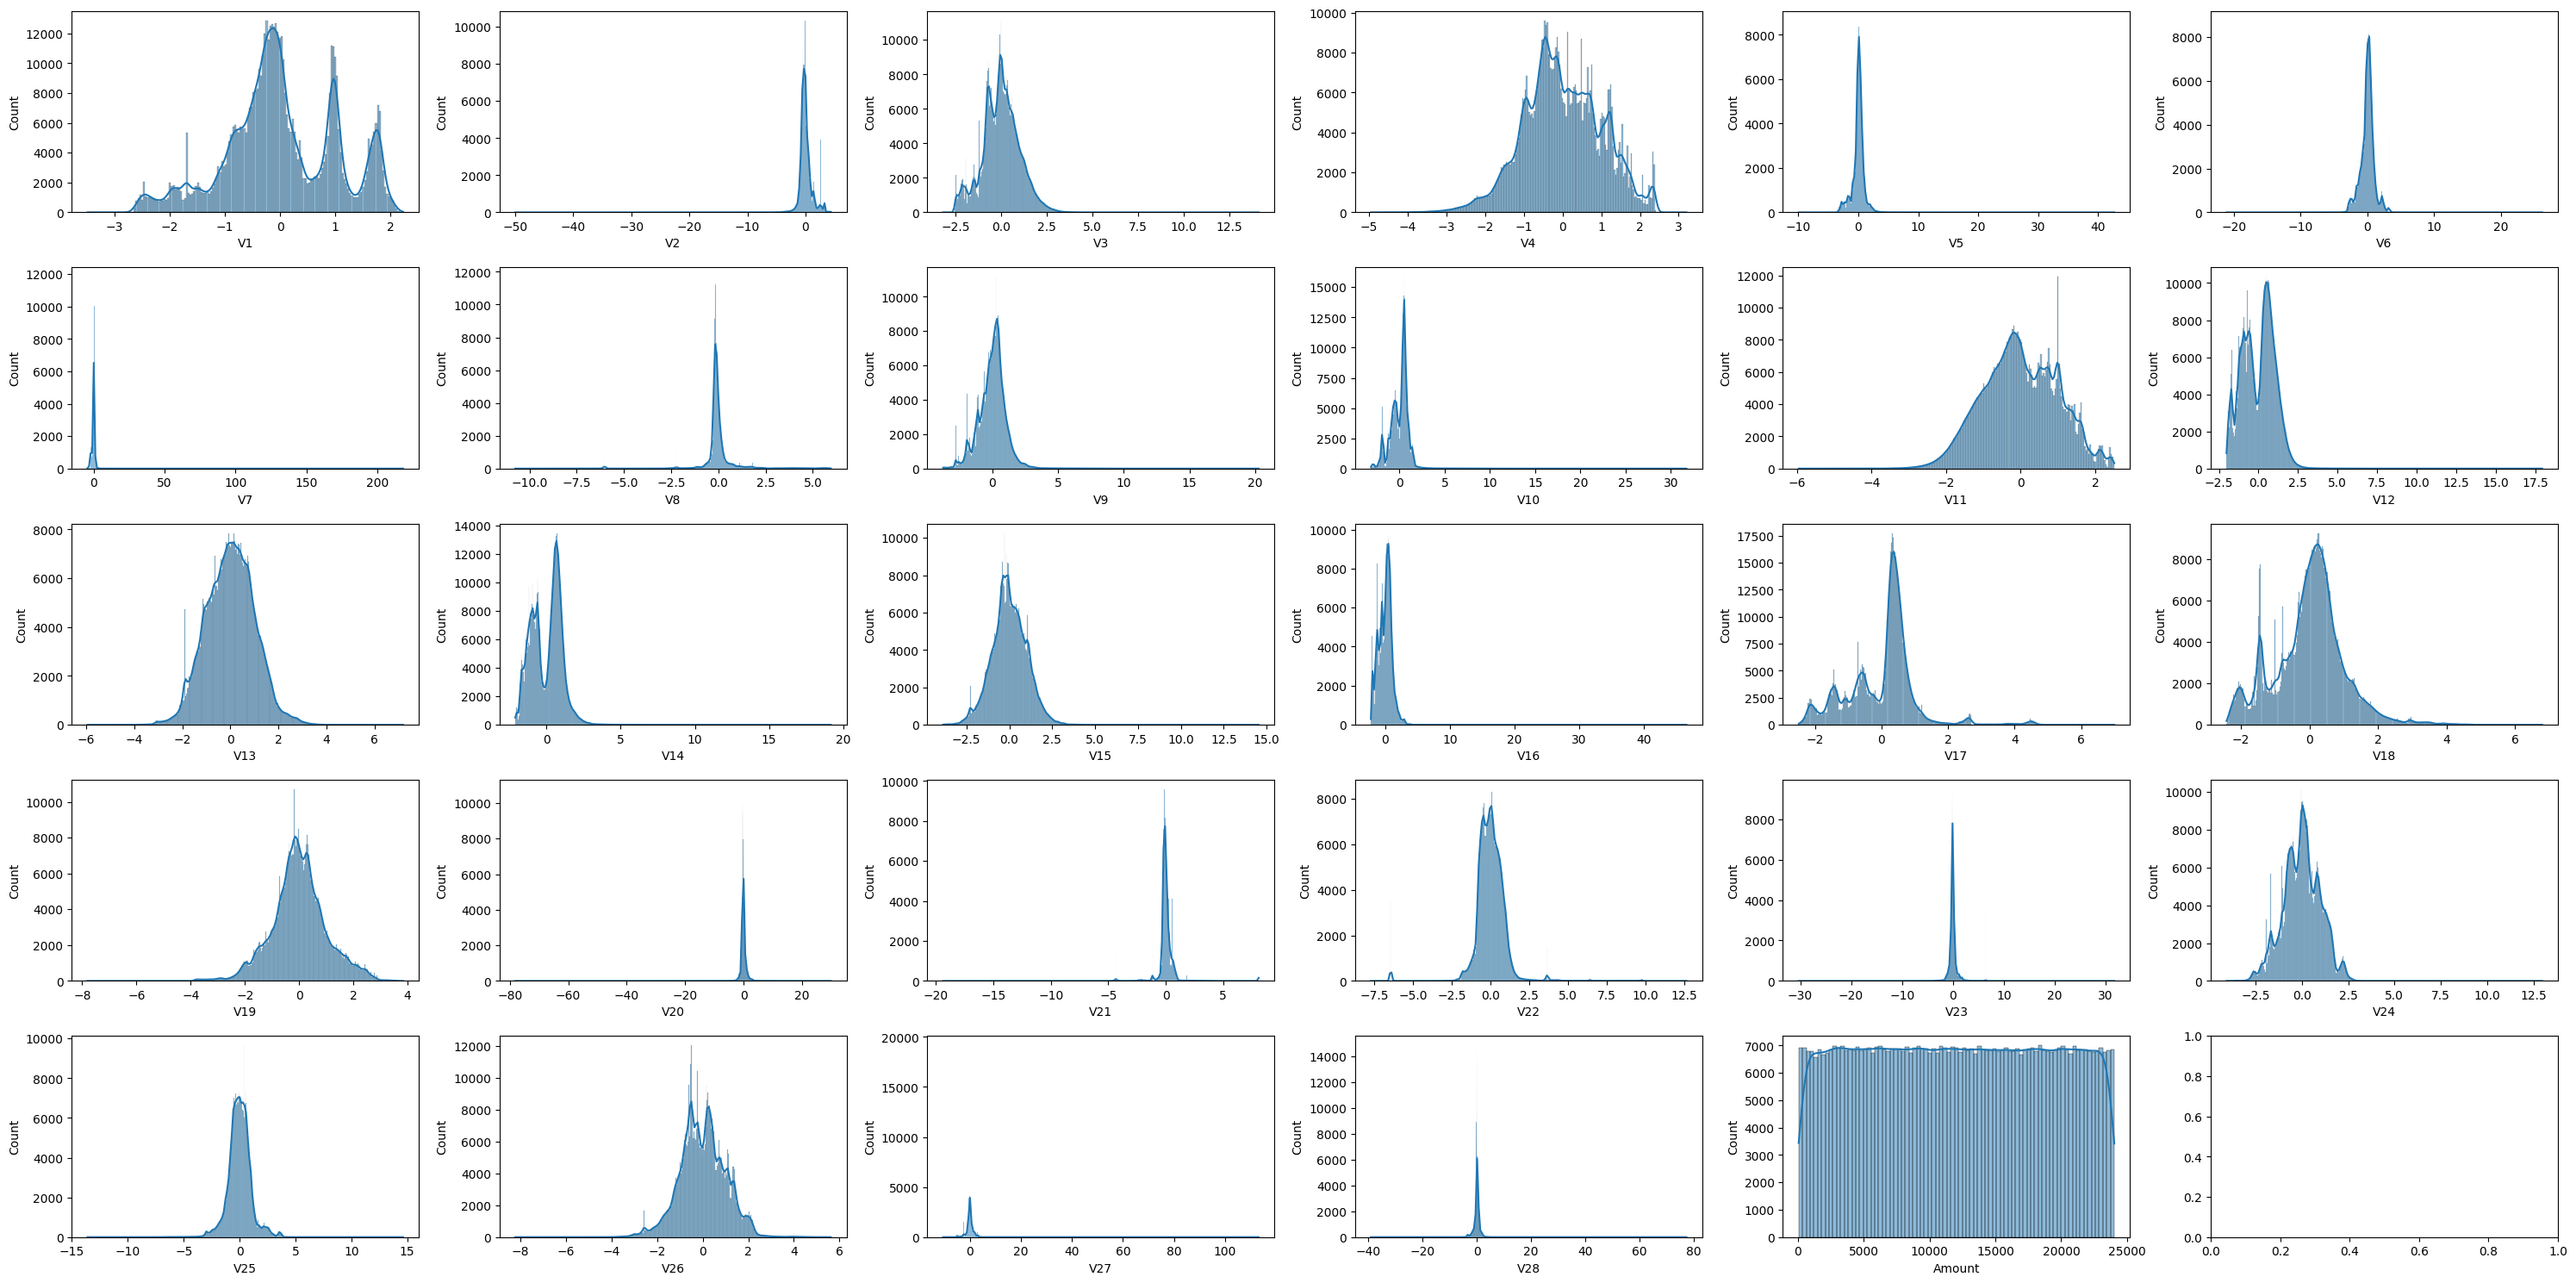

In [12]:
fig, ax = plt.subplots(5, 6, figsize = (30, 15))
ax = ax.flatten()

for i in range(len(df.columns[:-1])):
    sns.histplot(df[df.columns[i]], kde = True, ax = ax[i])
    
plt.tight_layout()
plt.show()

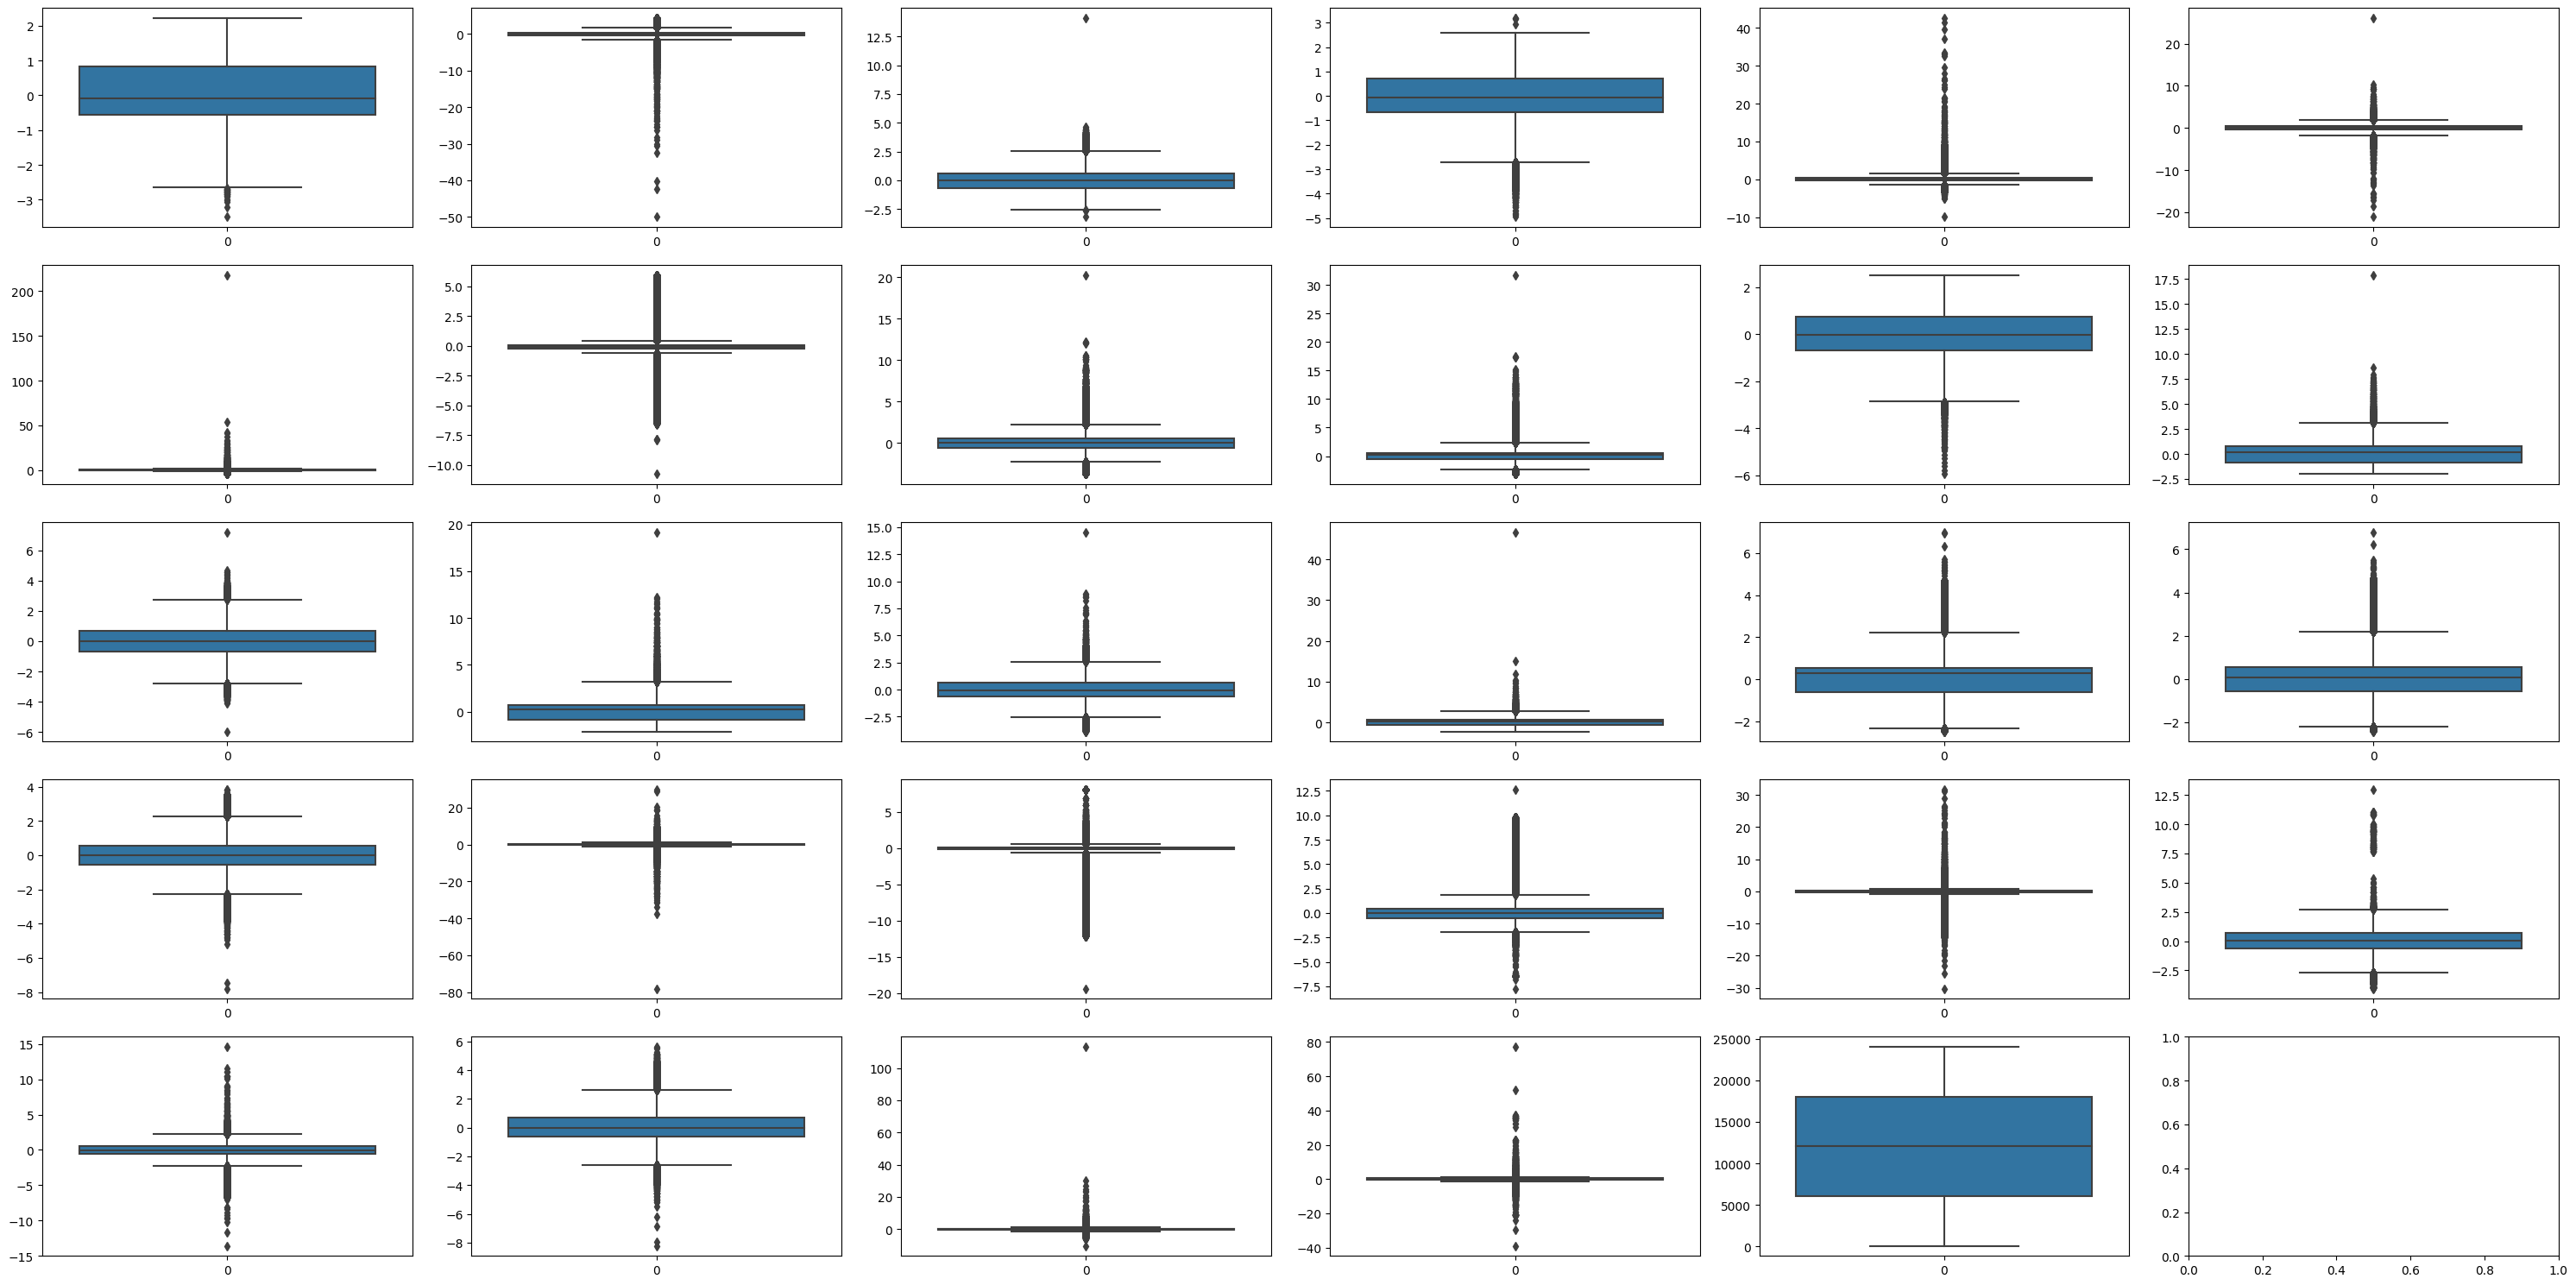

In [13]:
fig, ax = plt.subplots(5, 6, figsize = (30, 15))
ax = ax.flatten()

for i in range(len(df.columns[:-1])):
    sns.boxplot(df[df.columns[i]], ax = ax[i])
    
plt.tight_layout()
plt.show()

In [14]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report

In [18]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns = "Class"), df["Class"], test_size = 0.2, random_state = 42)

In [24]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

In [25]:
X_train_scaled

array([[ 0.31213157,  0.25826656, -0.3501122 , ...,  0.50812951,
         0.86840675, -0.26875907],
       [-0.73986278,  0.88554241, -1.10148173, ..., -0.13266645,
        -0.95144456,  0.04090277],
       [-0.27835988,  0.17629641, -0.47715031, ..., -0.09530756,
        -0.96366427, -1.29703047],
       ...,
       [-0.98715375, -0.24083186, -0.80678558, ...,  2.00990857,
         0.81538095,  0.99732592],
       [ 0.13622656, -0.13014929,  1.50565227, ..., -0.37226952,
        -0.57679947, -0.75219215],
       [ 1.01978874, -0.73077178,  0.67787661, ..., -0.23609888,
        -0.00709312, -1.45537779]])

In [41]:
model = Sequential()
model.add(Dense(10, activation = 'relu', input_dim = X_train_scaled.shape[1]))
model.add(Dense(1, activation = 'sigmoid'))

In [42]:
model.summary()

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_7 (Dense)                 │ (None, 10)             │           300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 311 (1.21 KB)

 Trainable params: 311 (1.21 KB)

 Non-trainable params: 0 (0.00 B)

In [44]:
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
history = model.fit(X_train_scaled, y_train, epochs = 10, validation_split = 0.2) 

Epoch 1/10
11373/11373 ━━━━━━━━━━━━━━━━━━━━ 24s 2ms/step - accuracy: 0.9507 - loss: 0.1267 - val_accuracy: 0.9762 - val_loss: 0.0605
Epoch 2/10
11373/11373 ━━━━━━━━━━━━━━━━━━━━ 21s 2ms/step - accuracy: 0.9779 - loss: 0.0556 - val_accuracy: 0.9815 - val_loss: 0.0470
Epoch 3/10
11373/11373 ━━━━━━━━━━━━━━━━━━━━ 22s 2ms/step - accuracy: 0.9829 - loss: 0.0452 - val_accuracy: 0.9847 - val_loss: 0.0408
Epoch 4/10
11373/11373 ━━━━━━━━━━━━━━━━━━━━ 22s 2ms/step - accuracy: 0.9865 - loss: 0.0384 - val_accuracy: 0.9879 - val_loss: 0.0346
Epoch 5/10
11373/11373 ━━━━━━━━━━━━━━━━━━━━ 22s 2ms/step - accuracy: 0.9884 - loss: 0.0347 - val_accuracy: 0.9885 - val_loss: 0.0321
Epoch 6/10
11373/11373 ━━━━━━━━━━━━━━━━━━━━ 22s 2ms/step - accuracy: 0.9898 - loss: 0.0305 - val_accuracy: 0.9894 - val_loss: 0.0307
Epoch 7/10
11373/11373 ━━━━━━━━━━━━━━━━━━━━ 21s 2ms/step - accuracy: 0.9903 - loss: 0.0294 - val_accuracy: 0.9911 - val_loss: 0.0279
Epoch 8/10
11373/11373 ━━━━━━━━━━━━━━━━━━━━ 21s 2ms/step - accuracy: 

In [45]:
scaler = StandardScaler()
X_test_scaled = scaler.fit_transform(X_test)

In [46]:
y_prob = model.predict(X_test_scaled)

3554/3554 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step


In [48]:
y_pred = np.where(y_prob > 0.5, 1, 0)

In [50]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99     56750
           1       0.99      0.99      0.99     56976

    accuracy                           0.99    113726
   macro avg       0.99      0.99      0.99    113726
weighted avg       0.99      0.99      0.99    113726



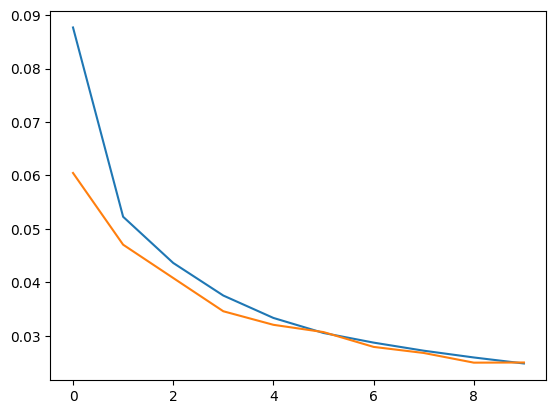

In [55]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

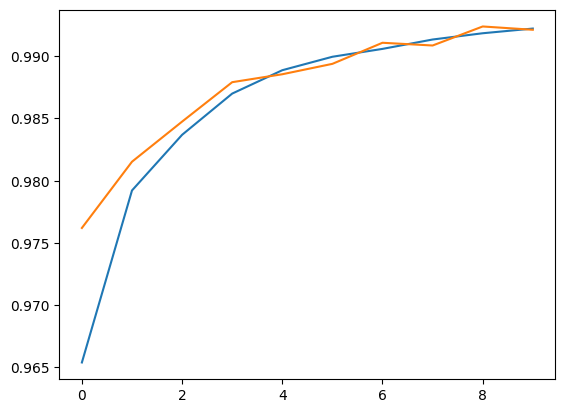

In [56]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])